<a href="https://colab.research.google.com/github/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/blob/main/Generating_CLustering_with_different_Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd 
import io 
from sklearn.metrics import davies_bouldin_score
import numpy as np
from fcmeans import FCM
from sklearn.cluster import MiniBatchKMeans
import pandas as pd 
import io 
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Counter
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks

### Load the Dataset

In [2]:
colon_df = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\aug_train_processed.csv')
colon_df.head()

id  Gender  Previously_Insured  \
0  ae8c7b68-7667-4c61-b7fe-6d43d65b826a       1                   1   
1  cec371f4-f0d0-417d-b06b-2f0b39320743       1                   0   
2  41c05fa9-4ef2-4c88-bc85-9842059fbc0e       0                   0   
3  ca7618bf-5e28-420f-9df3-4923e0c69bed       0                   0   
4  f3b46943-eab8-4670-80f2-1427744ff60d       1                   1   

   Vehicle_Age  Vehicle_Damage  Policy_Sales_Channel  Vintage  Response  \
0            1               0                 152.0       16         0   
1            0               1                  26.0      135         0   
2            0               1                 124.0      253         0   
3            1               0                 152.0       69         0   
4            1               0                 152.0      211         0   

   Age_Group  Annual_Premium_Treated  Region_Category  
0          2                  2630.0                2  
1          0                 43327.0                0  
2          1                 35841.0                0  
3          2                 27645.0                0  
4          2                 29023.0                0

In [3]:
# declare feature vector and target variable

X = colon_df.drop(['Response','id'], axis=1)
y = colon_df['Response']
# Use sampling_strategy if needed, for example: 'majority'
tl = TomekLinks(sampling_strategy='majority')

# Then fit_resample your data
X_tl, y_tl = tl.fit_resample(X, y)


In [4]:
# Assuming X and y are your features and labels

sorted(Counter(y_tl ).items())
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_tl, y_tl )
print(sorted(Counter(y_resampled).items()))

[(0, 205901), (1, 62564)]


In [5]:
# Assuming X is a DataFrame and has column names
# If X was not originally a DataFrame, you would need to adjust this part
columns = X.columns

# Convert the resampled X array back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=columns)

# Convert the resampled y array back to a DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['Response'])

# Combine the resampled X and y DataFrames
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
resampled_df.head()
# Now, resampled_df is your combined DataFrame containing both features and the target variable


Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       1                   1            1               0   
1       0                   0            1               0   
2       1                   1            1               0   
3       0                   1            1               0   
4       1                   0            0               1   

   Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                 152.0       16          2                  2630.0   
1                 152.0       69          2                 27645.0   
2                 152.0      211          2                 29023.0   
3                 152.0       23          2                 27954.0   
4                  26.0      209          0                  2630.0   

   Region_Category  Response  
0                2         0  
1                0         0  
2                0         0  
3                2         0  
4                0         0

In [6]:
colon_df=resampled_df
colon_majority_df=colon_df[colon_df['Response']==0]
colon_majority_df.shape

(205901, 10)

In [7]:
colon_minority_df=colon_df[colon_df['Response']==1]
colon_minority_df.shape

(62564, 10)

In [8]:
colon_majority_df=colon_df[colon_df['Response']==0]
colon_majority_df.head()

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       1                   1            1               0   
1       0                   0            1               0   
2       1                   1            1               0   
3       0                   1            1               0   
4       1                   0            0               1   

   Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                 152.0       16          2                  2630.0   
1                 152.0       69          2                 27645.0   
2                 152.0      211          2                 29023.0   
3                 152.0       23          2                 27954.0   
4                  26.0      209          0                  2630.0   

   Region_Category  Response  
0                2         0  
1                0         0  
2                0         0  
3                2         0  
4                0         0

In [9]:
colon_minority_df=colon_df[colon_df['Response']==1]
colon_minority_df.head()

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
205901       1                   0            0               1   
205902       1                   0            1               1   
205903       1                   0            0               1   
205904       1                   0            0               1   
205905       1                   0            0               1   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
205901                 122.0      217          0                 27801.0   
205902                 122.0      165          0                 25434.0   
205903                 124.0      263          0                 38347.0   
205904                  26.0      155          0                 33303.0   
205905                 157.0      256          0                  2630.0   

        Region_Category  Response  
205901                0         1  
205902                0         1  
205903                0         1  
205904                0         1  
205905                0         1

In [10]:
colon_df.isnull().values.any()

False

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16224\3535905792.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(colon_df['Response'], sort = True)


Text(0, 0.5, 'Frequency')

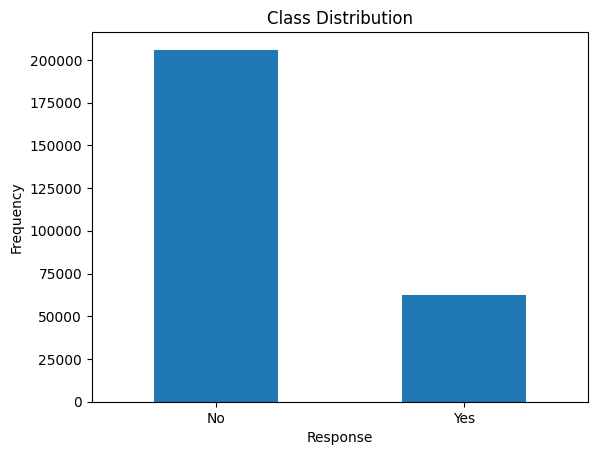

In [11]:
count_classes = pd.value_counts(colon_df['Response'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")
LABELS = ["No", "Yes"]
plt.xticks(range(2), LABELS)

plt.xlabel("Response")

plt.ylabel("Frequency")

In [12]:
print(colon_minority_df.shape,colon_majority_df.shape)

(62564, 10) (205901, 10)


In [13]:
majority=colon_majority_df['Response']
colon_majority_df=colon_majority_df.drop('Response',axis=1)
colon_majority_df.head()

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       1                   1            1               0   
1       0                   0            1               0   
2       1                   1            1               0   
3       0                   1            1               0   
4       1                   0            0               1   

   Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                 152.0       16          2                  2630.0   
1                 152.0       69          2                 27645.0   
2                 152.0      211          2                 29023.0   
3                 152.0       23          2                 27954.0   
4                  26.0      209          0                  2630.0   

   Region_Category  
0                2  
1                0  
2                0  
3                2  
4                0

# Different Clustering :

In [14]:
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

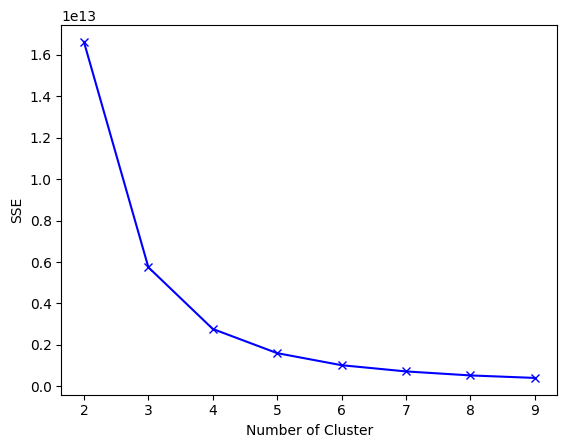

In [15]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans

sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(colon_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

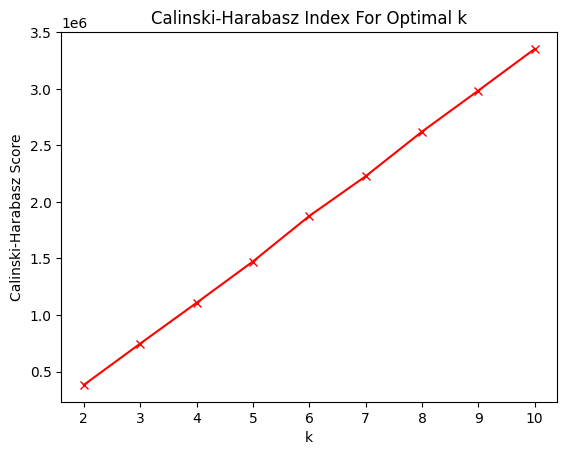

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Define the range for 'k'
K = range(2, 11)  # Starting from 2 because a single cluster does not make sense for this index

ch_scores = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(colon_majority_df)  # Ensure colon_majority_df is your DataFrame
    ch_score = calinski_harabasz_score(colon_majority_df, labels)
    ch_scores.append(ch_score)

# Plotting the Calinski-Harabasz scores for different values of 'k'
plt.plot(K, ch_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index For Optimal k')
plt.show()

In [17]:
num_of_clusters=5

##**KMEANS CLUSTERING**

In [18]:
#Kmeans:
kmeans=KMeans(n_clusters=num_of_clusters,init='random',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans']=kmeans.labels_

In [19]:
partition1 = colon_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels 

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  cluster_label  
0                     2              4  
1                     0              0  
2                     0              0  
3                     2              0  
4                     0              4  
...                 ...            ...  
205896                2              0  
205897                0              0  
205898                0              2  
205899                0              0  
205900                2              3  

[205901 rows x 10 columns]

# **CLUSTER VISUALIZATION USING PCA FOR REDUCING DIMENSIONS**

In [20]:
import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## **KMEANS++ CLUSTERING**

In [21]:
#Kmeans++:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

In [22]:
partition2 = colon_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels 

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  cluster_label  
0                     2              1  
1                     0              4  
2                     0              2  
3                     2              4  
4                     0              1  
...                 ...            ...  
205896                2              4  
205897                0              4  
205898                0              3  
205899                0              4  
205900                2              2  

[205901 rows x 10 columns]

In [23]:
km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(colon_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46427, cost: 630000.0
Run 1, iteration: 2/100, moves: 3066, cost: 630000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 79122, cost: 638857.0
Run 2, iteration: 2/100, moves: 9169, cost: 638857.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 52564, cost: 643689.0
Run 3, iteration: 2/100, moves: 4033, cost: 643689.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 42220, cost: 640520.0
Run 4, iteration: 2/100, moves: 19553, cost: 633971.0
Run 4, iteration: 3/100, moves: 1069, cost: 633971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 45210, cost: 636460.0
Run 5, iteration: 2/100, moves: 12417, cost: 636460.0
Best run w

array([3, 2, 3, ..., 3, 2, 2], dtype=uint16)

In [24]:
partition3 = colon_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels 

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  cluster_label  
0                     2              3  
1                     0              2  
2                     0              3  
3                     2              2  
4                     0              0  
...                 ...            ...  
205896                2              2  
205897                0              3  
205898                0              3  
205899                0              2  
205900                2              2  

[205901 rows x 10 columns]

## **K-prototypes Clustering**

In [25]:
colon_majority_df=colon_df[colon_df['Response']==0]

# Assuming 'colon_majority' is your dataframe and 'num_of_clusters' is set
num_of_clusters = 5  # Example: set to 5 or any other appropriate number based on your data

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', verbose=2)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(colon_majority_df)

# Print the resulting clusters
print(clusters)

Initialization complete
Iteration 0, inertia 1817409045206.9375.
Iteration 1, inertia 1649099952823.5593.
Iteration 2, inertia 1631685301530.063.
Iteration 3, inertia 1623279776893.9604.
Iteration 4, inertia 1617058538727.0264.
Iteration 5, inertia 1612608706720.229.
Iteration 6, inertia 1609590757096.016.
Iteration 7, inertia 1607158055326.4912.
Iteration 8, inertia 1605434993964.2852.
Iteration 9, inertia 1604103991045.6152.
Iteration 10, inertia 1603196150176.8315.
Iteration 11, inertia 1602592676799.3254.
Iteration 12, inertia 1602142122563.1006.
Iteration 13, inertia 1601783466943.031.
Iteration 14, inertia 1601497478594.9326.
Iteration 15, inertia 1601273959624.8413.
Converged at iteration 15: center shift 2144.699078493471 within tolerance 2303.2444476213605.
[1 0 0 ... 4 0 3]


In [26]:
partition4 = colon_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clusters
partition4

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  Response  cluster_label  
0                     2         0              1  
1                     0         0              0  
2                     0         0              0  
3                     2         0              0  
4                     0         0              1  
...                 ...       ...            ...  
205896                2         0              0  
205897                0         0              0  
205898                0         0              4  
205899                0         0              0  
205900                2         0              3  

[205901 rows x 11 columns]

## **MINIBATCH KMEANS CLUSTERING**

In [27]:

mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(colon_majority_df)
clustering_result['Minibatch']=mbk.labels_

In [28]:
clustering_result['Minibatch'].values

array([1, 4, 0, ..., 3, 4, 0])

In [29]:
partition5 = colon_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = clustering_result['Minibatch']
partition5

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  Response  cluster_label  
0                     2         0              1  
1                     0         0              4  
2                     0         0              0  
3                     2         0              4  
4                     0         0              1  
...                 ...       ...            ...  
205896                2         0              4  
205897                0         0              4  
205898                0         0              3  
205899                0         0              4  
205900                2         0              0  

[205901 rows x 11 columns]

## **Fuzzy K-Means Clustering**

In [30]:
fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(colon_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(colon_majority_df.values)
fcm_labels

array([4, 3, 3, ..., 0, 3, 2], dtype=int64)

In [31]:
partition6 = colon_majority_df
partition6=partition6.reset_index(drop=True)
partition6['cluster_label'] = fcm_labels
partition6

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0            1                   1            1               0   
1            0                   0            1               0   
2            1                   1            1               0   
3            0                   1            1               0   
4            1                   0            0               1   
...        ...                 ...          ...             ...   
205896       0                   1            1               0   
205897       1                   0            1               1   
205898       1                   1            1               0   
205899       0                   1            1               0   
205900       0                   1            1               0   

        Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                      152.0       16          2                2630.000   
1                      152.0       69          2               27645.000   
2                      152.0      211          2               29023.000   
3                      152.0       23          2               27954.000   
4                       26.0      209          0                2630.000   
...                      ...      ...        ...                     ...   
205896                 152.0      131          2               22911.000   
205897                 152.0      105          2               23938.000   
205898                 152.0      144          2               61800.375   
205899                 152.0      208          2               25380.000   
205900                 152.0      104          2               30396.000   

        Region_Category  Response  cluster_label  
0                     2         0              4  
1                     0         0              3  
2                     0         0              3  
3                     2         0              3  
4                     0         0              4  
...                 ...       ...            ...  
205896                2         0              3  
205897                0         0              3  
205898                0         0              0  
205899                0         0              3  
205900                2         0              2  

[205901 rows x 11 columns]

In [32]:
partition1, partition2, partition3, partition4,partition5,partition6

(        Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
 0            1                   1            1               0   
 1            0                   0            1               0   
 2            1                   1            1               0   
 3            0                   1            1               0   
 4            1                   0            0               1   
 ...        ...                 ...          ...             ...   
 205896       0                   1            1               0   
 205897       1                   0            1               1   
 205898       1                   1            1               0   
 205899       0                   1            1               0   
 205900       0                   1            1               0   
 
         Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
 0                      152.0       16          2                2630.000   
 1                      152.

In [33]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i],partition6.cluster_label[i])
  #if partition1.cluster_label[i]==partition2.cluster_label[i]:
    #c+=1

4 1 3 1 1 4
0 4 2 0 4 3
0 2 3 0 0 3
0 4 2 0 4 3
4 1 0 1 1 4
4 1 0 1 1 4
2 3 3 4 3 0
1 0 2 2 2 1
1 0 3 2 2 1
4 1 1 1 1 4
0 4 3 0 0 3
0 4 2 0 4 3
1 0 2 2 2 1
0 4 3 0 4 3
4 1 2 1 1 4
3 2 3 3 0 2
1 0 2 2 2 1
0 4 0 0 4 3
0 4 2 0 4 3
0 4 0 0 4 3
1 0 0 2 2 1
2 3 3 4 3 0
2 3 0 4 3 0
3 2 2 3 0 2
2 3 2 4 3 0
0 4 2 0 4 3
1 0 0 2 2 1
0 4 2 0 4 3
3 2 2 3 0 2
3 2 3 3 0 2
3 2 3 3 0 2
0 4 2 0 4 3
0 4 0 0 4 3
3 2 2 3 0 2
0 4 2 0 0 3
3 0 1 3 2 1
0 4 0 0 4 3
3 2 2 3 0 2
0 4 2 0 4 3
3 2 3 3 0 2
3 2 1 3 0 2
3 2 2 3 0 2
3 2 3 3 0 2
1 0 2 2 2 1
3 2 0 3 0 2
4 1 3 1 1 4
3 2 2 0 0 2
2 3 4 4 3 0
0 4 1 0 4 3
3 2 2 3 0 2
3 2 4 3 0 2
0 4 0 0 4 3
4 1 2 1 1 4
0 4 3 0 4 3
4 1 1 1 1 4
4 1 0 1 1 4
1 0 1 2 2 1
0 4 0 0 4 3
1 0 4 2 2 1
0 4 3 0 4 3
0 4 2 0 4 3
2 3 0 4 3 0
1 0 2 2 2 1
0 4 3 0 4 3
3 2 2 3 2 2
4 1 0 1 1 4
2 3 2 4 3 0
1 0 2 2 2 1
4 1 0 1 1 4
2 3 3 4 3 0
0 4 2 0 4 3
3 2 2 3 0 2
0 4 2 0 4 3
4 1 3 1 1 4
0 4 2 0 4 3
1 0 4 2 2 1
2 3 0 4 3 0
1 0 0 2 2 1
2 3 2 4 3 0
0 4 2 0 4 3
0 4 2 0 4 3
1 0 0 2 2 1
1 0 3 2 2 1
0 4 

## **Finding the 3 Best algorithms for our model:**

In [34]:

print("Kmeans (partition 1): ",davies_bouldin_score(colon_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(colon_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(colon_majority_df, partition3.cluster_label))
print("K-prototypes(partition 4): ",davies_bouldin_score(colon_majority_df, partition4.cluster_label))
print("Minibatch Kmeans (partition 5): ",davies_bouldin_score(colon_majority_df, partition5.cluster_label))
print("Fuzzy K-means(partition 6): ",davies_bouldin_score(colon_majority_df, partition6.cluster_label))

Kmeans (partition 1):  0.44797287164968597
Kmeans++ (partition 2):  0.44887004097321553
KModes (partition 3):  58.30233963281283
K-prototypes(partition 4):  0.44667520452164594
Minibatch Kmeans (partition 5):  0.4509446200590272
Fuzzy K-means(partition 6):  0.44643265672884125


In [35]:
partitionA, partitionB, partitionC = partition1, partition5, partition6
colon_majority = colon_majority_df
colon_majority['C1'] = partitionA.cluster_label.values
colon_majority['C2'] = partitionB.cluster_label.values
colon_majority['C3'] = partitionC.cluster_label.values

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16224\2166545233.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16224\2166545233.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_16224\2166545233.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [36]:
colon_majority.head()

Gender  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       1                   1            1               0   
1       0                   0            1               0   
2       1                   1            1               0   
3       0                   1            1               0   
4       1                   0            0               1   

   Policy_Sales_Channel  Vintage  Age_Group  Annual_Premium_Treated  \
0                 152.0       16          2                  2630.0   
1                 152.0       69          2                 27645.0   
2                 152.0      211          2                 29023.0   
3                 152.0       23          2                 27954.0   
4                  26.0      209          0                  2630.0   

   Region_Category  Response  C1  C2  C3  
0                2         0   4   1   4  
1                0         0   0   4   3  
2                0         0   0   0   3  
3                2         0   0   4   3  
4                0         0   4   1   4

In [38]:
colon_majority.to_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\colon_majority.csv', index = False)